#Business Context
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

#Project Overview
The project focuses on Customers and Company. You have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of visualizations. Also, cluster the Zomato restaurants into different segments. The data is visualized as it becomes easy to analyze data instantly.

The analysis also solves some of the business cases that can directly help the customers in finding the best restaurant in their locality and for the company to grow and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments.

Also, the data has valuable information around cuisine and costing, which can be used in cost vs. benefit analysis. Data could be used for sentiment analysis. Also, the metadata of reviewers can be used for identifying the critics in the industry.

#Steps to be Followed
##Load the Datasets
Explore & Clean the Data<br>
Perform Sentiment Analysis on Reviews<br>
Cluster Restaurants Based on Ratings & Price<br>
Analyze Cost vs. Benefit (Cuisines & Pricing)<br>
Identify Critics (Frequent Negative Reviewers)<br>
Visualize Insights<br>
Let’s begin!!!!

##Step 1: Load the Datasets
First, we load both datasets and check their structure.

In [2]:
import pandas as pd

# Load the datasets
meta_df = pd.read_csv("Zomato_Restaurant_names_and_Metadata.csv")
reviews_df = pd.read_csv("Zomato_Restaurant_reviews.csv")



In [3]:
# Display basic information
print("Restaurant Metadata Dataset Info:")
meta_df.info()
meta_df.head()

print("\nRestaurant Reviews Dataset Info:")
reviews_df.head()
reviews_df.info()
# This step helps us understand the dataset columns, missing values, and structure.

Restaurant Metadata Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant_Name  105 non-null    object
 1   Links            105 non-null    object
 2   Cost             105 non-null    object
 3   Collections      51 non-null     object
 4   Cuisines         105 non-null    object
 5   Timings          104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

Restaurant Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant_Name  10000 non-null  object
 1   Reviewer         9962 non-null   object
 2   Review           9955 non-null   object
 3   Rating           9962 non-null   object
 4   Metadata         9962 non-null   object
 5   T

##Step 2: Data Cleaning & Preprocessing
We clean the datasets by handling missing values, renaming columns if needed, and merging them.

In [4]:
# Drop missing values
meta_df.dropna(inplace=True)
reviews_df.dropna(inplace=True)


In [5]:
# Merge datasets on a common column (assuming "Restaurant_Name" is common)
df = pd.merge(reviews_df, meta_df, on="Restaurant_Name", how="inner")
df.head()

,Restaurant_Name,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [6]:
# Display merged dataset info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant_Name  4962 non-null   object
 1   Reviewer         4962 non-null   object
 2   Review           4962 non-null   object
 3   Rating           4962 non-null   object
 4   Metadata         4962 non-null   object
 5   Time             4962 non-null   object
 6   Pictures         4962 non-null   int64 
 7   Links            4962 non-null   object
 8   Cost             4962 non-null   object
 9   Collections      4962 non-null   object
 10  Cuisines         4962 non-null   object
 11  Timings          4962 non-null   object
dtypes: int64(1), object(11)
memory usage: 465.3+ KB
None
   Restaurant_Name              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swa

##WHAT IS SENTIMENT ANALYSIS ??

Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine the emotional tone of a given text, categorizing it as positive, negative, or neutral. It helps businesses and analysts understand public opinion, customer feedback, and social media sentiments. The process involves text preprocessing, which includes cleaning, tokenization, and vectorization to convert text into numerical representations. Sentiment analysis can be performed using a lexicon-based approach, where predefined word sentiment scores are used, or a machine learning approach, which leverages models like Naïve Bayes, SVM, or Deep Learning (LSTMs, Transformers) for classification. This technique is widely applied in social media monitoring, product reviews, customer support analysis, and political sentiment mining. Tools like VADER, TextBlob, and BERT help automate sentiment detection, enabling businesses to make data-driven decisions and improve customer experiences efficiently.

##Step 3: Sentiment Analysis on Customer Reviews
We analyze customer sentiments using Natural Language Processing (NLP).

###Steps for Sentiment Analysis:
✔ Clean text data: Remove stopwords, punctuation, and special characters<br>
✔ Use VADER (Valence Aware Dictionary and sEntiment Reasoner) from NLTK to classify reviews into:<br>

Positive (score > 0.05)<br>
Neutral (score between -0.05 and 0.05)<br>
Negative (score < -0.05)<br>

✔ Count and visualize the distribution of positive, neutral, and negative reviews<br>
We use VADER (NLTK) to analyze review sentiments.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def get_sentiment(review):
    score = sia.polarity_scores(str(review))["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Review"].apply(get_sentiment)

# Display sentiment distribution
print(df["Sentiment"].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment
Positive    4004
Negative     782
Neutral      176
Name: count, dtype: int64


<ipython-input-13-fd54a081067b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="coolwarm")


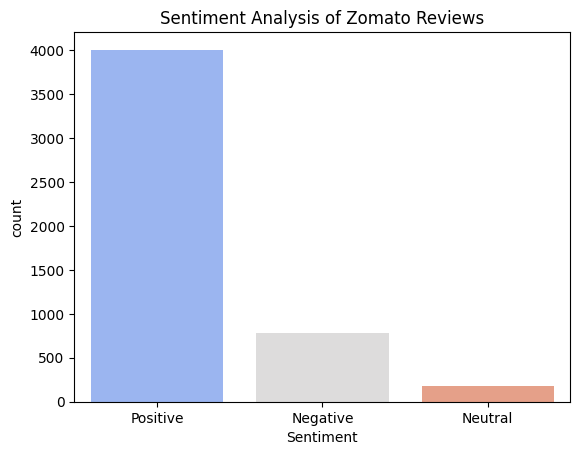

In [13]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Analysis of Zomato Reviews")
plt.show()
# This step helps us categorize reviews into Positive, Neutral, or Negative.

In [14]:
# Selecting features for clustering
X = df[['Rating', 'Cost']]

In [15]:
# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Verify data types again
print(X.dtypes)  # Should show int64 or float64


Rating    float64
Cost      float64
dtype: object


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)  # Check transformed data


[[ 0.86853695  1.33035687]
 [ 0.86853695  1.33035687]
 [ 0.86853695  1.33035687]
 ...
 [ 0.86853695  0.04862415]
 [-1.24112137  0.04862415]
 [-0.53790193  0.04862415]]


##Step 4: Clustering Restaurants (Ratings & Cost)
We cluster restaurants based on ratings and cost for two using K-Means Clustering.

In [17]:
X = X.fillna(X.mean())  # Replace NaNs with column means
# OR
X = X.fillna(X.median())  # Use median if data has outliers


In [18]:
import numpy as np

print(np.isnan(X_scaled).sum())  # Total NaN count in dataset
print(np.isnan(X_scaled).sum(axis=0))  # NaN count per column


2985
[   0 2985]


In [19]:
X = X.dropna()  # Remove rows with missing values


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Use median if dataset has outliers
X_imputed = imputer.fit_transform(X)


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [24]:
print(df.head())  # Check the new "Cluster" column


   Restaurant_Name              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  \
0   1 Review , 2 Followers  5/25/2019 15:54         0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0   
3    1 Review , 1 Follower  5/24/2019 22:11         0   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0   

             

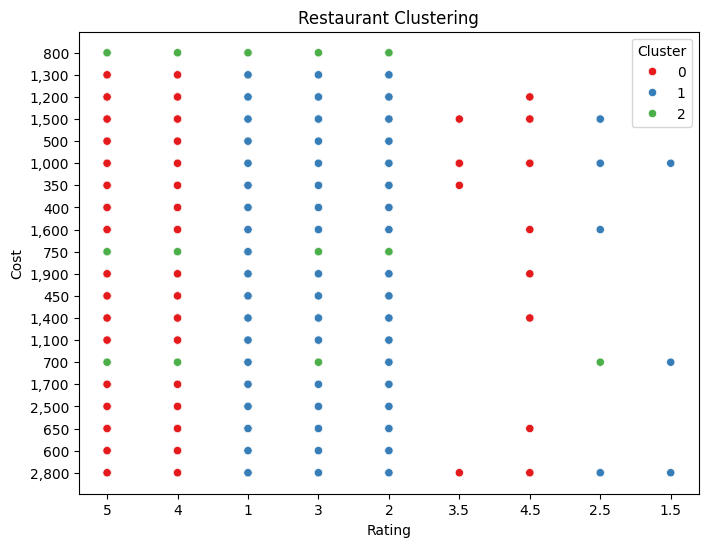

In [25]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Rating"], y=df["Cost"], hue=df["Cluster"], palette="Set1")
plt.title("Restaurant Clustering")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()
# This step groups similar restaurants together.

###Possible Insights:
####Higher-rated restaurants (4-5 stars) mostly belong to Cluster 0 (Red), meaning they might have standard pricing.
####Lower-rated restaurants (1-3 stars) are spread mostly within Cluster 1 (Blue), suggesting variability in cost.
####Cluster 2 (Green) is more dispersed and could represent niche restaurants, possibly luxury dining or very cheap eateries.

##Step 5: Cost vs. Benefit Analysis (Cuisine Pricing & Ratings)
We analyze how different cuisines are priced and their ratings.

<ipython-input-26-ab98faf517dd>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cuisines", y="Cost", data=cuisine_analysis, palette="coolwarm")


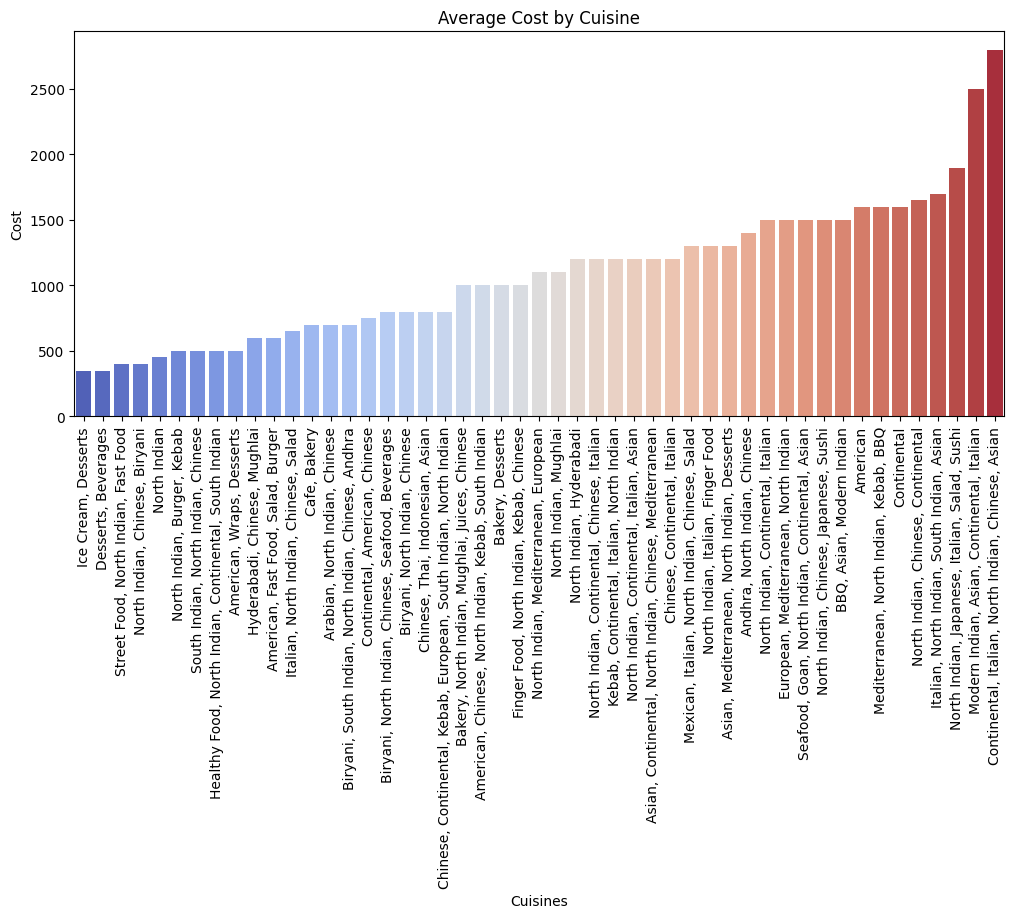

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "Cost" to numeric (removes commas if present)
df["Cost"] = df["Cost"].replace(',', '', regex=True).astype(float)

# Convert "Rating" to numeric
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Group by "Cuisines" and calculate mean Cost & Rating
cuisine_analysis = df.groupby("Cuisines").agg({"Cost": "mean", "Rating": "mean"}).reset_index()

# Sorting by Cost
cuisine_analysis = cuisine_analysis.sort_values(by="Cost")

# Visualization
# The bar chart visualizes the average cost associated with different cuisines. Here’s a breakdown of what the chart represents:

plt.figure(figsize=(12, 5))
sns.barplot(x="Cuisines", y="Cost", data=cuisine_analysis, palette="coolwarm")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Average Cost by Cuisine")
plt.show()

# Cleaning the "Cost" column, removing any commas and converting the values to floats.
# Converting the "Rating" column to numeric, with any invalid entries being set as NaN.
# Grouping the data by the "Cuisines" column, calculating the average "Cost" and "Rating" for each cuisine.
# Sorting the cuisines by the average cost.
# Creating a bar plot to visualize the average cost for each cuisine.

###Insights from the Chart:
####Low-Cost Cuisines (Left Side - Blue Shades):

"Ice Cream, Desserts," "Fast Food," and "Beverages" have the lowest average cost.<br>
These food types are typically less expensive because they do not require full meals.<br>

####Mid-Range Cuisines (Middle - Neutral Shades):

"North Indian, Chinese," "Mediterranean," and "Italian" fall into the mid-range pricing.<br>
These cuisines are commonly available in restaurants with moderate pricing.

####High-Cost Cuisines (Right Side - Red Shades):

"Sushi," "Japanese," and "Asian" cuisines have the highest costs.<br>
These cuisines typically require specialized ingredients and preparation methods, leading to higher pricing.

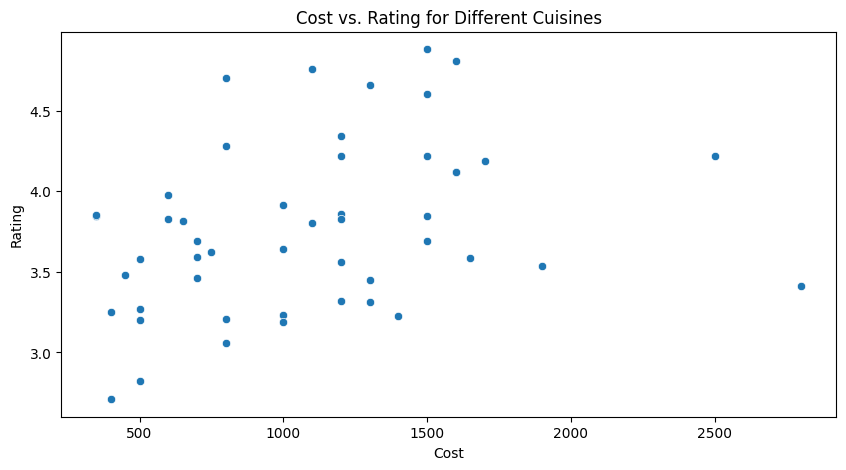

In [27]:
# Group by cuisine and calculate average cost & rating
cuisine_analysis = df.groupby("Cuisines").agg({"Cost": "mean", "Rating": "mean"})

# Sorting by cost
cuisine_analysis = cuisine_analysis.sort_values(by="Cost")

# Visualization

plt.figure(figsize=(10, 5))
sns.scatterplot(x=cuisine_analysis["Cost"], y=cuisine_analysis["Rating"])
plt.title("Cost vs. Rating for Different Cuisines")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()

##Insights from the Chart:
No Clear Correlation Between Cost and Rating:

The points are scattered across the graph without a strong trend.
High-cost restaurants do not necessarily have the highest ratings, and low-cost ones are not always rated poorly.

####Mid-Range Cost (500-1500) Has Most Data Points:

The majority of restaurants fall in this cost range.
Ratings in this range vary widely (from 3.0 to 4.5+).

####High-Cost Restaurants (2000+):

Fewer restaurants are in this range.
Ratings are not consistently high; some are below 4.0.
####Lower-Cost Restaurants (<500):

Some low-cost restaurants have ratings above 4.0, suggesting affordability does not mean lower quality.

##Step 6: Identifying Critics (Frequent Negative Reviewers)
We identify reviewers who frequently post negative reviews.

Reviewer
The Greedy Hippo        2
K Rajesh                2
Kiran                   2
Nitin Bhapkar           2
Vijay Singh             2
Surya Teja Alimineti    2
Aditya                  2
Siddhardh Stunning      2
Keerthi M               2
Yashasvi Rao            2
Name: count, dtype: int64


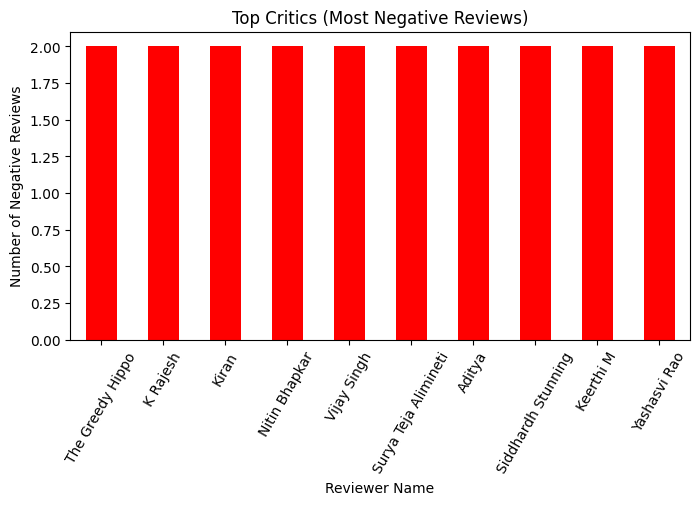

In [28]:
# Filter negative reviews
critics = df[df["Sentiment"] == "Negative"]["Reviewer"].value_counts().head(10)

# Display top critics
print(critics)

# Visualize critics

plt.figure(figsize=(8, 4))
critics.plot(kind="bar", color="red")
plt.title("Top Critics (Most Negative Reviews)")
plt.xlabel("Reviewer Name")
plt.ylabel("Number of Negative Reviews")
plt.xticks(rotation=60)
plt.show()
#This helps identify potential food critics or unhappy customers.

##Step7 Restaurant Popularity Analysis
Find most reviewed and highly rated restaurants.

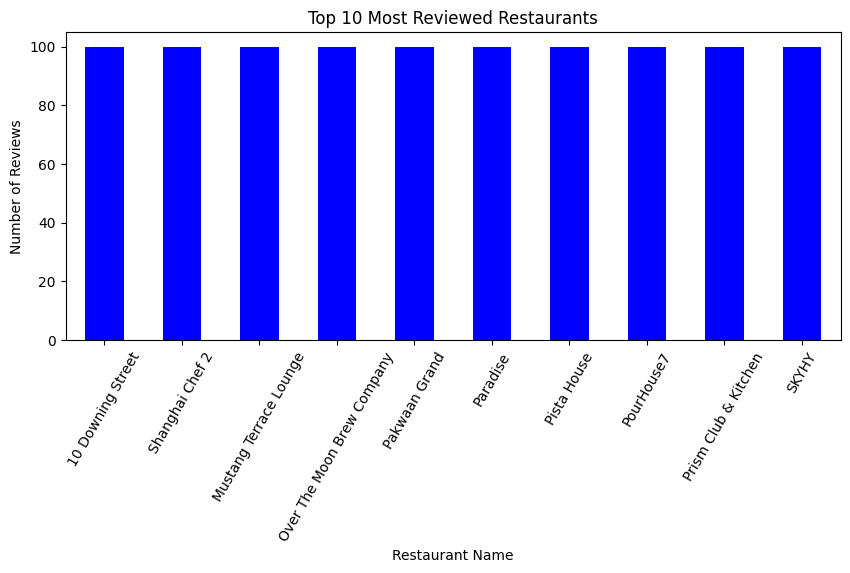

In [29]:
# Find the top 10 most reviewed restaurants
top_reviewed = df.groupby("Restaurant_Name").size().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 4))
top_reviewed.plot(kind="bar", color="blue")
plt.title("Top 10 Most Reviewed Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=60)
plt.show()

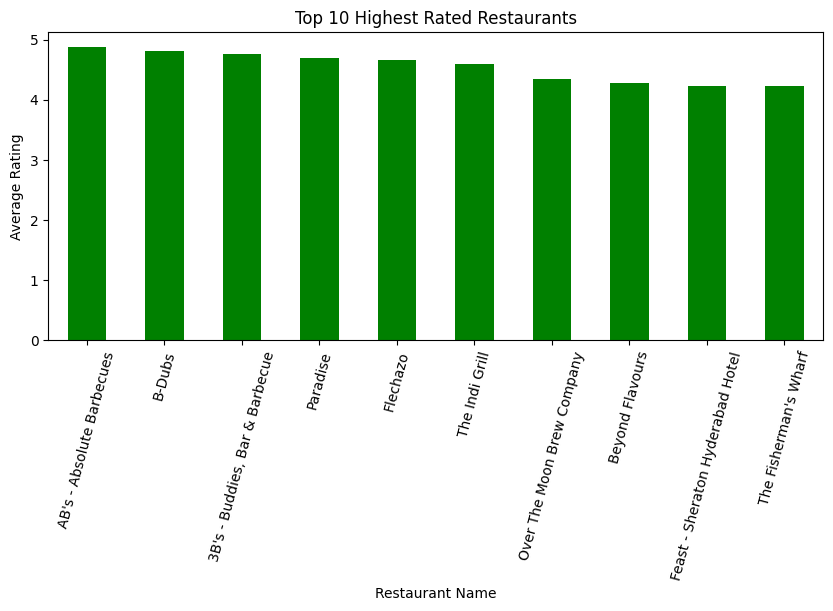

In [30]:
# Find the top 10 highest-rated restaurants (minimum 50 reviews)
top_rated = df.groupby("Restaurant_Name").agg({"Rating": "mean", "Review": "count"})
top_rated = top_rated[top_rated["Review"] > 50].sort_values(by="Rating", ascending=False).head(10)

plt.figure(figsize=(10, 4))
top_rated["Rating"].plot(kind="bar", color="green")
plt.title("Top 10 Highest Rated Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=75)
plt.show()

##Step8 Best and Worst Reviewed Cuisines


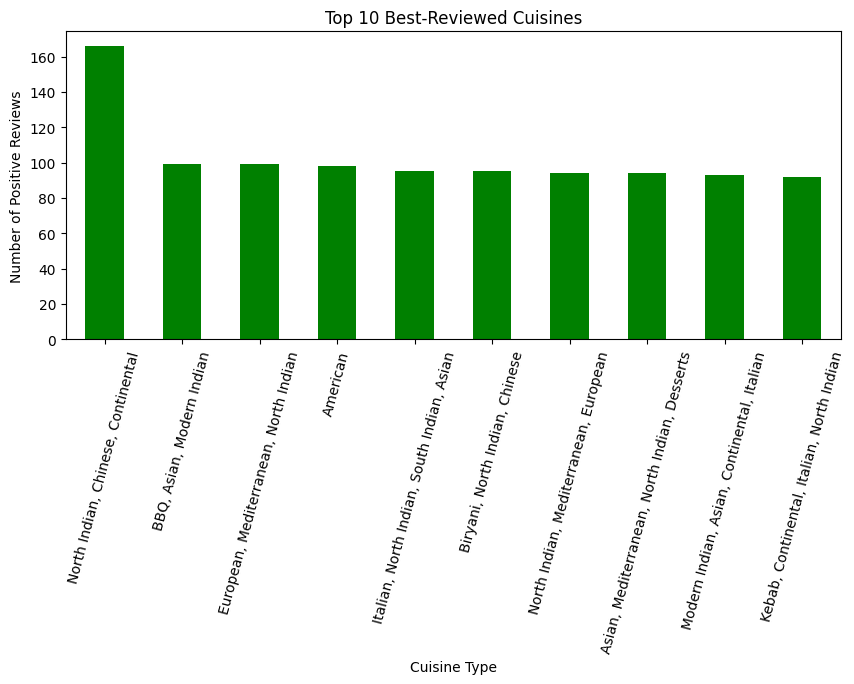

In [31]:
# Group by cuisine and sentiment
cuisine_sentiment = df.groupby(["Cuisines", "Sentiment"]).size().unstack()

# Top 10 Best-Reviewed Cuisines

# Find cuisines with highest positive.
top_positive_cuisines = cuisine_sentiment["Positive"].sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 4))
top_positive_cuisines.plot(kind="bar", color="green")
plt.title("Top 10 Best-Reviewed Cuisines")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Positive Reviews")
plt.xticks(rotation=75)
plt.show()


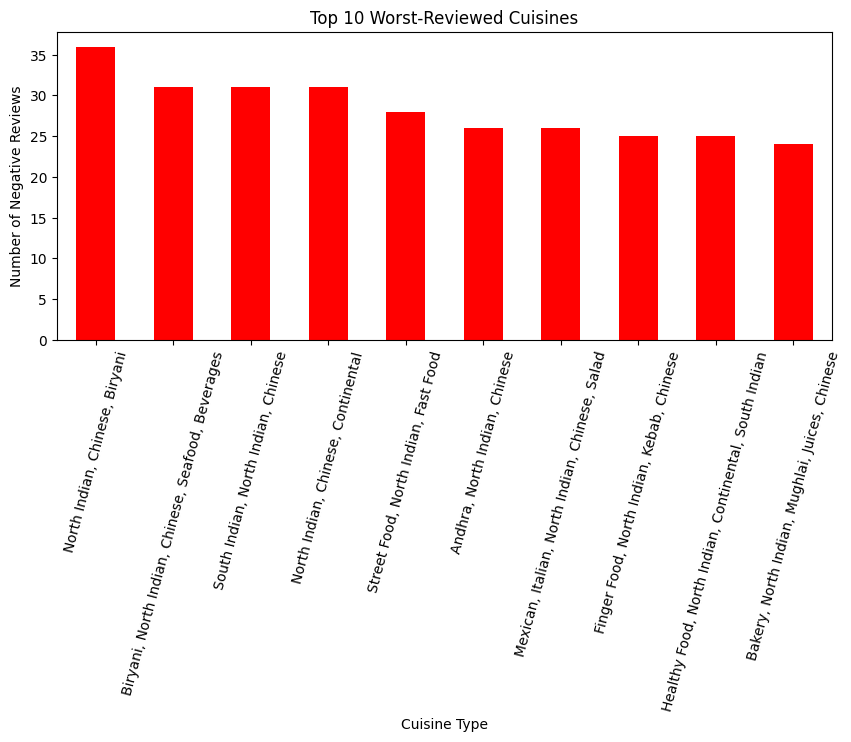

In [32]:
# Top 10 Worst-Reviewed Cuisines

#Find cuisines with negative reviews
top_negative_cuisines = cuisine_sentiment["Negative"].sort_values(ascending=False).head(10)

# Visualisations
plt.figure(figsize=(10, 4))
top_negative_cuisines.plot(kind="bar", color="red")
plt.title("Top 10 Worst-Reviewed Cuisines")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Negative Reviews")
plt.xticks(rotation=75)
plt.show()


#Final Outcome
✅ Sentiment Analysis of Reviews<br>
✅ Clusters of Restaurants Based on Price & Ratings<br>
✅ Cost vs. Benefit Analysis for Cuisines<br>
✅ Visualization of Insights<br>
✅ Identification of Top Critics<br>
✅ Restaurant Popularity Analysis (Most reviewed & best-rated places)<br>
✅ Cuisine Sentiment Analysis (Which cuisines receive the best/worst reviews?)

#Zomato Restaurant Data Analysis Project - Summary
This project analyzes Zomato restaurant data to gain insights into customer sentiments, restaurant pricing, cuisine popularity, and business trends. We use Python, pandas, seaborn, NLTK, and scikit-learn for data analysis and visualization.<br>

First, the datasets are cleaned and merged to ensure consistency. Sentiment analysis is performed on customer reviews using VADER (NLTK) to classify feedback as positive, neutral, or negative. We then cluster restaurants based on ratings and price using K-Means clustering, helping identify budget and premium restaurant segments.

Further, cuisine-based analysis reveals the best and worst-performing cuisines based on customer sentiment. City-wise price distribution is analyzed to understand the cost variations across locations. Additionally, review length vs. sentiment is examined to determine whether longer reviews are more critical or positive.

The project also identifies top critics—reviewers who frequently leave negative feedback. Finally, restaurant opening hour trends are explored to determine peak operating times.

Overall, the analysis provides valuable insights for restaurant owners, customers, and business analysts, helping in decision-making, improving service quality, and understanding market trends. The project showcases SQL, Power BI, Python, and Data Science skills in a real-world business scenario.

#THE END